In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## EDO de primer orden
Se obtiene una ecuacioin diferencial que determina la velocidad terminal de un objeto con relacion a su velocidad versus la fuerza gravitatoria a la cual este se somete
$$
v'(t) = g - cv^2
$$

donde c es el coeficiente de friccion y g es la aceleracion dentro del campo gravitatorio de la tierra. 

In [2]:
def edo_1(v, t, g, c):
    dvdt = g - c*v**2
    return dvdt

Asumimos que las constantes $c=1.0$ y $g=9.81$

In [3]:
c = 1.0
g = 9.81

Para la condicion inicial asumiremos que el objeto esta en reposo $v_0 = 0$ y se aproxima hacia la superficie de la tierra. Guardaremos la solucion en el intervalo de $0 \leq t \leq 2$ con una definición de 1000 muestras.

In [4]:
v0 = 0
tx = np.linspace(0 ,2 ,1000)

Finalmente invocamos el metodo `odeint` con los parametros `v, t, g, c` para generar la solucion analítica.

In [5]:
v = odeint(edo_1, v0, tx, args=(g, c))

''

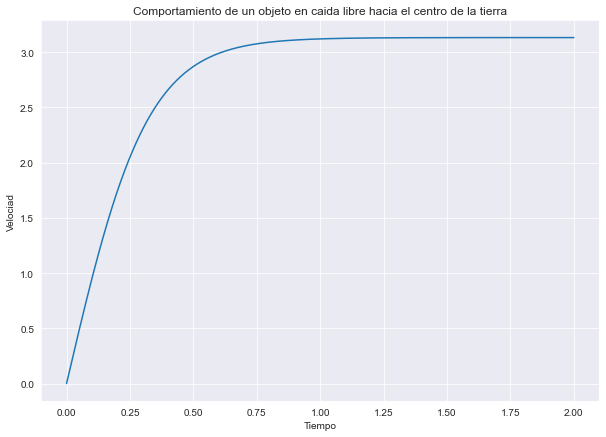

In [6]:
sns.set_style('darkgrid')
plt.subplots(figsize=(10, 7))
plt.plot(tx, v);
plt.title("Comportamiento de un objeto en caida libre hacia el centro de la tierra")
plt.xlabel("Tiempo")
plt.ylabel("Velociad")
;

## EDO de segundo orden

Para la EDO de segundo orden tenemos el angulo teta de un pendulo que se somete a la fuerza de la gravedad con friccion obtenemos:

$$\theta''(t) + b \theta'(t) + c sin(\theta(t)) = 0$$

donde b y c son constantes positivas. Para solucionar esta EDO en ODEint, debemos convertir esta ecuacion de segundo orden a un sistema EDOs de primer orden. al definir nuestra velocidad angular como $\omega(t) = \theta'(t)$ obetenemos el siguiente sistema de ecuaciones diferenciales:

$$
\theta'(t) = \omega(t) \\
\omega'(t) = -b\omega(t) - csin(\theta(t))
$$

 Sea `y` un arreglo `[theta, omega]`, he implementamos el sistema en python de la siguiente manera:

In [7]:
def pend(y, t, b, c):
    theta, omega = y
    dydt = [omega, -b*omega - c*np.sin(theta)]
    return dydt

Asumimos que las constantes $b = 0.25$ y $c=5.0$

In [8]:
b = 0.25
c = 5.0

Para las Condiciones iniciales, asumiremos que el pendulo estara en una posicion casi vertical con $\theta_0 = \pi -0.1$ e inicial mente en reposo es decir $\omega_0 = 0$, entonces nuestro arreglo `y` de condiciones iniciales seria:

In [9]:
y0 = [np.pi - 0.1, 0]

Generaremos una solucion en el intervalo $0 \leq t \leq 10$ con una definicion de 101 muestras. Nuestro arreglo de valores de te entonces quedaria asi:

In [10]:
t = np.linspace(0, 10, 101)

Ahora invocamos el método `odeint` con los parámetros `y, t, b, c` para generar la solución grafica 

In [11]:
solucion = odeint(pend, y0, t, args=(b, c))

La solucion es un arreglo que nos muestra los valores integrados de $\theta$ y $\omega$. El codigo a continiuacion grafica las soluciones:

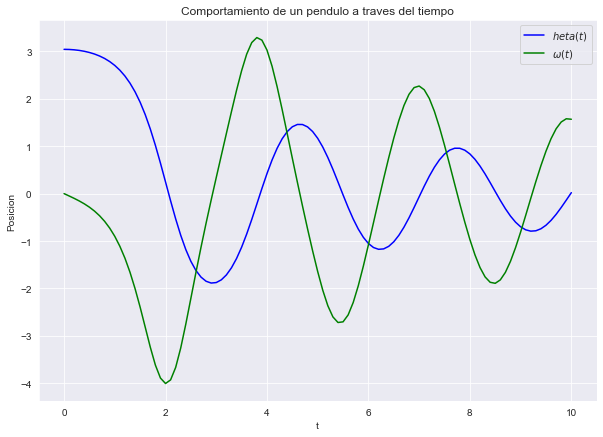

In [12]:
plt.subplots(figsize=(10, 7))
plt.plot(t, solucion[:, 0], 'b', label='$\theta(t)$')
plt.plot(t, solucion[:, 1], 'g', label='$\omega(t)$')
plt.legend(loc='best')
plt.title('Comportamiento de un pendulo a traves del tiempo')
plt.xlabel('t')
plt.ylabel('Posicion');